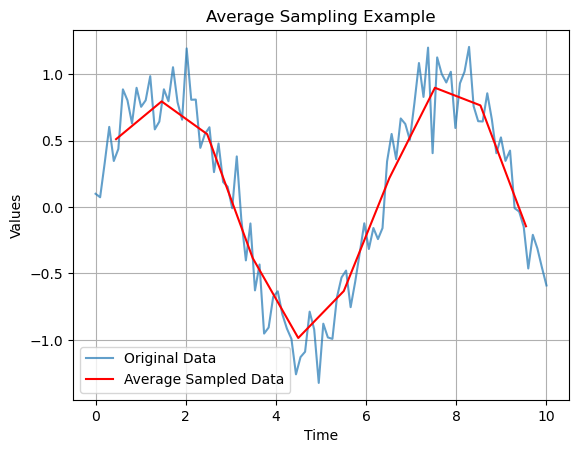

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic time-series data
np.random.seed(42)  # For reproducibility
time = np.linspace(0, 10, 100)  # 100 time points between 0 and 10
values = np.sin(time) + np.random.normal(0, 0.2, size=len(time))  # Sine wave + noise

# Define the interval for average sampling (e.g., 10 points per interval)
interval = 10

# Compute average values for each interval
average_time = [np.mean(time[i:i + interval]) for i in range(0, len(time), interval)]
average_values = [np.mean(values[i:i + interval]) for i in range(0, len(values), interval)]

# Plot the original data
plt.plot(time, values, label="Original Data", alpha=0.7)

# Plot the average-sampled data
plt.plot(average_time, average_values, color='red', label="Average Sampled Data", zorder=3)

# Add labels and legend
plt.title("Average Sampling Example")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()


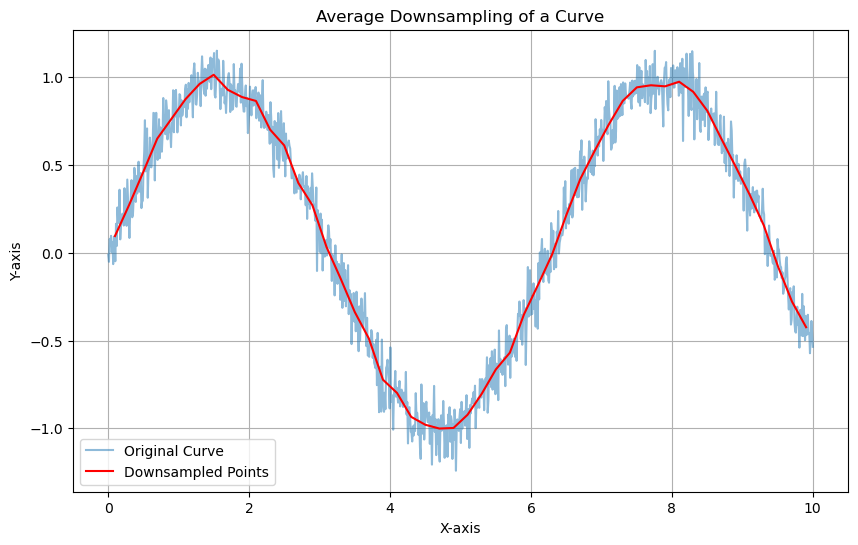

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Original curve (example data)
x = np.linspace(0, 10, 1000)  # 1000 points from 0 to 10
y = np.sin(x) + 0.1 * np.random.randn(len(x))  # Sine wave with noise

# Downsampling parameters
downsample_factor = 20  # Number of points in each segment

# Downsample the curve
num_segments = len(y) // downsample_factor
downsampled_y = [
    np.mean(y[i * downsample_factor:(i + 1) * downsample_factor])
    for i in range(num_segments)
]
downsampled_x = [
    np.mean(x[i * downsample_factor:(i + 1) * downsample_factor])
    for i in range(num_segments)
]

# Plot the original and downsampled curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Original Curve", alpha=0.5)
plt.plot(downsampled_x, downsampled_y, color="red", label="Downsampled Points")
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Average Downsampling of a Curve")
plt.grid()
plt.show()


In [3]:
import numpy as np

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Example data
data = [1, 3, 5, 7, 9, 11, 13, 15]
smoothed = moving_average(data, window_size=3)

print("Original Data:", data)
print("Smoothed Data:", smoothed)
print(type(smoothed))



Original Data: [1, 3, 5, 7, 9, 11, 13, 15]
Smoothed Data: [ 3.  5.  7.  9. 11. 13.]
<class 'numpy.ndarray'>


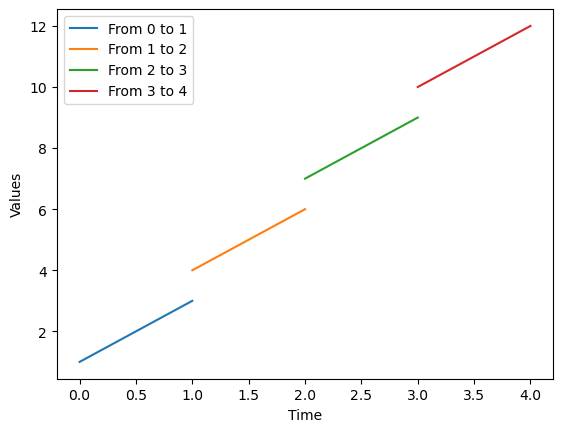

In [5]:
#test code for plotting with time intervals
import matplotlib.pyplot as plt
import numpy as np

# Example data: Time differences (x-axis)
time_differences = np.array([0, 1, 2, 3, 4])  # Time differences between points
arrays_to_plot = [
    np.array([1, 2, 3]),  # Array to plot between time 0 and time 1
    np.array([4, 5, 6]),  # Array to plot between time 1 and time 2
    np.array([7, 8, 9]),  # Array to plot between time 2 and time 3
    np.array([10, 11, 12]),  # Array to plot between time 3 and time 4
    np.array([13, 14, 15])   # Array to plot between time 4 and the next time
]

# Plotting each array with y-values distributed across the time differences
for i in range(len(time_differences) - 1):
    # Time points for this array, evenly spaced between two time intervals
    x_values = np.linspace(time_differences[i], time_differences[i+1], len(arrays_to_plot[i]))
    
    # Plot each array across the time interval
    plt.plot(x_values, arrays_to_plot[i], label=f'From {time_differences[i]} to {time_differences[i+1]}')

plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()


In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load MATLAB file
mat_file = r'C:\Device5_ 1.mat' 
mat_data = scipy.io.loadmat(mat_file)

# Access the measurement.transient table
measurement_transient = mat_data['measurement']['transient'][0, 0]  # Adjust indexing if needed

# Extract columns from the table
dates = [row[0] for row in measurement_transient['date']]  # Extract date column
time_domains = [row[0]['collectorEmitterVoltage'][0, 0] for row in measurement_transient['timeDomain']]  # Access voltage data

# Step 1: Extract and process time from the date column
def extract_time(date_str):
    # Ensure date_str is a plain string
    if isinstance(date_str, np.ndarray):
        date_str = date_str.item()  # Convert numpy array to scalar (string)
    
    # Split date and time, and handle 12-hour format
    date_part, time_part, am_pm = date_str.split(" ")[:3]
    h, m, s = map(int, time_part.split(":"))
    if am_pm == 'PM' and h != 12:
        h += 12
    elif am_pm == 'AM' and h == 12:
        h = 0
    return h * 3600 + m * 60 + s  # Convert to total seconds


# Convert dates to relative time (starting from 0 seconds)
start_time = extract_time(dates[0])
relative_times = [extract_time(date) - start_time for date in dates]

# Step 2: Create x-axis values (time points) for each set of 125000 data points
x_axis = []
y_axis = []
for i, (rel_time, voltages) in enumerate(zip(relative_times, time_domains)):
    time_step = (relative_times[i + 1] - rel_time) / len(voltages) if i < len(relative_times) - 1 else 1e-5
    x_values = np.linspace(rel_time, rel_time + len(voltages) * time_step, len(voltages), endpoint=False)
    x_axis.extend(x_values)
    y_axis.extend(voltages)

# Limit to the first 10,000 points for example
limit = 10000
plt.figure(figsize=(15,10))
plt.plot(x_axis[:limit], y_axis[:limit], label="Collector-Emitter Voltage", color="blue")
plt.xlabel("Time (seconds)")
plt.ylabel("Collector-Emitter Voltage")
plt.title("Collector-Emitter Voltage vs Time")
plt.grid(True)
plt.legend(loc="best")
plt.tight_layout()
plt.show()



C:\Users\JASH\AppData\Local\Temp\ipykernel_16024\3956648778.py:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


import os

mat_file = r'C:\Device 5.mat'
if os.path.exists(mat_file):
    print("File exists.")
else:
    print("File not found.")


In [28]:
#Code for checking file exist
import os

# Correct file path
mat_file = r'C:\Device2  1.mat'  # Ensure the name matches exactly, including spaces

# Check if the file exists
if os.path.exists(mat_file):
    print("File exists.")
else:
    print(f"File not found at: {mat_file}")


File exists.


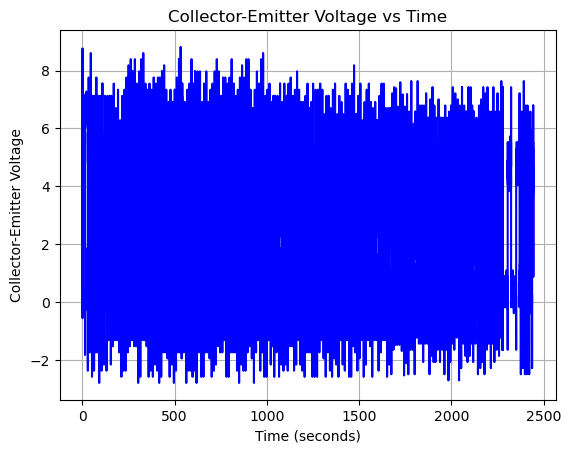

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load MATLAB file
mat_file = r'C:\Device4  1.mat' 
mat_data = scipy.io.loadmat(mat_file)

measurement = mat_data['measurement']
transient = measurement['transient']

total_time = 0
new_time = 0
original = 0 
time = np.array([])
ce_data_list = []

for i in range(len(transient[0,0][0])):
    date_str = transient[0,0][0][i][0][0]
    time_str = date_str.split(' ')[1]
    hour, minute, second = map(int, time_str.split(':'))
    
    new_time = hour*3600 + minute*60 + second
    if i == 0:
        original = new_time
    total_time = new_time - original

    time = np.append(time, total_time)
    
    ce_data = transient[0,0][0][i][2][0][0][4][0]
    ce_data_list.append(ce_data)

ce_data_array = np.array(ce_data_list)

for i in range(len(time) - 1):
    #if time[i]>=2000 and np.min(ce_data_array[i])<=4.25:
     #   break_i=i
      #  break
    # Time points for this array, evenly spaced between two time intervals
    x_values = np.linspace(time[i], time[i+1], len(ce_data_array[i]))
    
    # Plot each array across the time interval
    plt.plot(x_values, ce_data_array[i], color="blue")
    

plt.xlabel("Time (seconds)")
plt.ylabel("Collector-Emitter Voltage")
plt.title("Collector-Emitter Voltage vs Time")
plt.grid(True)
plt.show()

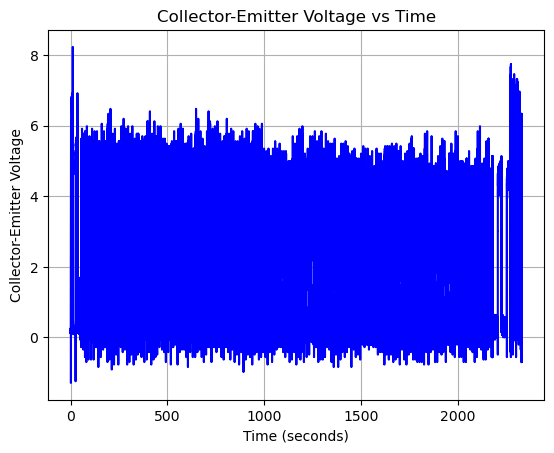

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    
# Load MATLAB file
mat_file = r'C:\Device5_ 1.mat' 
mat_data = scipy.io.loadmat(mat_file)

measurement = mat_data['measurement']
transient = measurement['transient']

total_time = 0
new_time = 0
original = 0 
time = np.array([])
ce_data_list = []

for i in range(106):
    date_str = transient[0,0][0][i][0][0]
    time_str = date_str.split(' ')[1]
    hour, minute, second = map(int, time_str.split(':'))
    
    new_time = hour*3600 + minute*60 + second
    if i == 0:
        original = new_time
    total_time = new_time - original

    time = np.append(time, total_time)
    
    ce_data = transient[0,0][0][i][2][0][0][4][0]
    ce_data_list.append(ce_data)

ce_data_array = np.array(ce_data_list)

for i in range(len(time) - 1):
    # Time points for this array, evenly spaced between two time intervals
    smoothed_data = moving_average(ce_data_array[i], window_size=3)
    x_values = np.linspace(time[i], time[i+1], len(smoothed_data))
    #print(type(smoothed_data))
    # Plot each array across the time interval
    plt.plot(x_values, smoothed_data, color="blue")

plt.xlabel("Time (seconds)")
plt.ylabel("Collector-Emitter Voltage")
plt.title("Collector-Emitter Voltage vs Time")
plt.grid(True)
plt.show()

In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    
# Load MATLAB file
mat_file = r'C:\Device5_ 1.mat' 
mat_data = scipy.io.loadmat(mat_file)

measurement = mat_data['measurement']
transient = measurement['transient']

total_time = 0
new_time = 0
original = 0 
time = np.array([])
ce_data_list = []

for i in range(106):
    date_str = transient[0,0][0][i][0][0]
    time_str = date_str.split(' ')[1]
    hour, minute, second = map(int, time_str.split(':'))
    
    new_time = hour*3600 + minute*60 + second
    if i == 0:
        original = new_time
    total_time = new_time - original

    time = np.append(time, total_time)
    
    ce_data = transient[0,0][0][i][2][0][0][3][0]
    ce_data_list.append(ce_data)

ce_data_array = np.array(ce_data_list)

ce_sampling_data = np.zeros_like(ce_data_array)  # Initialize a 2D array of the same shape

N = len(ce_data_array)

for i in range(len(ce_data_array)-1):
    ce_sampling_data[i] = ((time[i+1]-time[i])/(N-1))*ce_data_array[i]

for i in range(len(time) - 1):
    # Time points for this array, evenly spaced between two time intervals
    smoothed_data = moving_average(ce_sampling_data[i], window_size=3)
    x_values = np.linspace(time[i], time[i+1], len(smoothed_data))
    #print(type(smoothed_data))
    # Plot each array across the time interval
    #plt.plot(x_values, smoothed_data, color="blue")
    print(x_values)

plt.xlabel("Time (seconds)")
plt.ylabel("Collector-Emitter Voltage")
plt.title("Collector-Emitter Voltage vs Time")
plt.grid(True)
#plt.show()

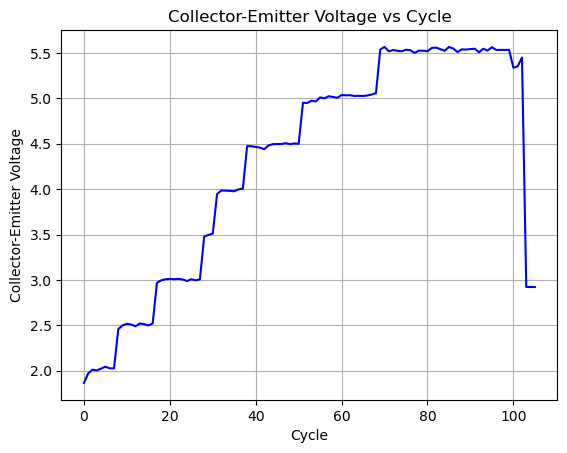

In [24]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
    
# Load MATLAB file
mat_file = r'C:\Device5_ 1.mat' 
mat_data = scipy.io.loadmat(mat_file)

measurement = mat_data['measurement']
transient = measurement['transient']

ce_data_list = []
for i in range(len(transient[0,0][0])):    
    ce_data = transient[0,0][0][i][2][0][0][3][0]
    ce_data_list.append(ce_data)

ce_data_array = np.array(ce_data_list)

ce_sampling_data = [()]
for i in range(len(ce_data_array)):  
    ce_sampling_data = np.append(ce_sampling_data, np.average(ce_data_array[i]))

x_values = np.arange(len(ce_sampling_data))

plt.plot(x_values, ce_sampling_data, color="blue")
plt.xlabel("Cycle")
plt.ylabel("Collector-Emitter Voltage")
plt.title("Collector-Emitter Voltage vs Cycle")
plt.grid(True)
plt.show()

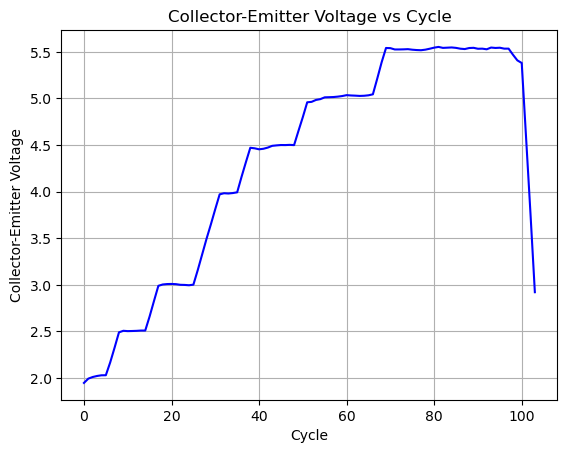

In [25]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    
# Load MATLAB file
mat_file = r'C:\Device5_ 1.mat' 
mat_data = scipy.io.loadmat(mat_file)

measurement = mat_data['measurement']
transient = measurement['transient']

ce_data_list = []
for i in range(len(transient[0,0][0])):    
    ce_data = transient[0,0][0][i][2][0][0][3][0]
    ce_data_list.append(ce_data)

ce_data_array = np.array(ce_data_list)

ce_sampling_data = [()]
for i in range(len(ce_data_array)):  
    ce_sampling_data = np.append(ce_sampling_data, np.average(ce_data_array[i]))

# Apply window smoothing
window_size = 3

def moving_average(data, window_size):
    # Use convolution to calculate the moving average
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

smoothed_data = moving_average(ce_sampling_data, window_size)

x_values = np.arange(len(smoothed_data))

plt.plot(x_values, smoothed_data, color="blue")
plt.xlabel("Cycle")
plt.ylabel("Collector-Emitter Voltage")
plt.title("Device 5")
plt.grid(True)
plt.show()

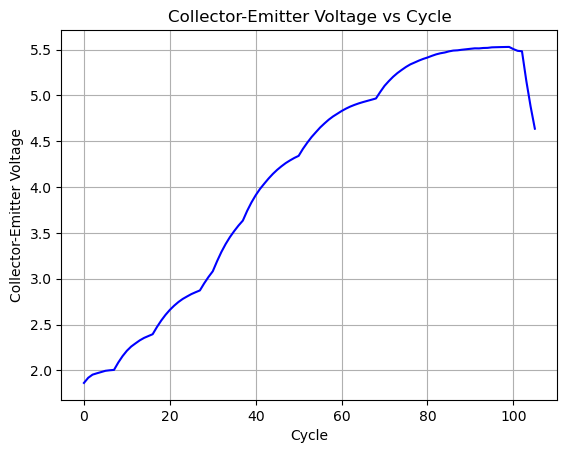

In [30]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    
# Load MATLAB file
mat_file = r'C:\Device5_ 1.mat' 
mat_data = scipy.io.loadmat(mat_file)

measurement = mat_data['measurement']
transient = measurement['transient']

ce_data_list = []
for i in range(len(transient[0,0][0])):    
    ce_data = transient[0,0][0][i][2][0][0][3][0]
    ce_data_list.append(ce_data)

ce_data_array = np.array(ce_data_list)

ce_sampling_data = [()]
for i in range(len(ce_data_array)):  
    ce_sampling_data = np.append(ce_sampling_data, np.average(ce_data_array[i]))

def calculate_weighted_average(x, t, span=15):
    theta = 2 / (span + 1)
    numerator = 0
    denominator = 0

    for i in range(t + 1):
        weight = (1 - theta) ** (t - i)
        numerator += weight * x[i]
        denominator += weight

    yt = numerator / denominator
    return yt

span = 15
ce_window_smooth = np.zeros(len(ce_sampling_data))
for t in range(len(ce_sampling_data)):
    ce_window_smooth[t] = calculate_weighted_average(ce_sampling_data, t, span)
    
x_values = np.arange(len(ce_window_smooth))

plt.plot(x_values, ce_window_smooth, color="blue")
plt.xlabel("Cycle")
plt.ylabel("Collector-Emitter Voltage")
plt.title("Collector-Emitter Voltage vs Cycle")
plt.grid(True)
plt.show()



In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

# Load MATLAB file
mat_file = r'C:\Device5_ 1.mat' 
mat_data = scipy.io.loadmat(mat_file)

measurement = mat_data['measurement']
transient = measurement['transient']

total_time = 0
new_time = 0
original = 0 
time = np.array([])
ce_data_list = []

for i in range(106):
    date_str = transient[0,0][0][i][0][0]
    time_str = date_str.split(' ')[1]
    hour, minute, second = map(int, time_str.split(':'))
    
    new_time = hour*3600 + minute*60 + second
    if i == 0:
        original = new_time
    total_time = new_time - original

    time = np.append(time, total_time)
    
    ce_data = transient[0,0][0][i][2][0][0][3][0]
    ce_data_list.append(ce_data)

ce_data_array = np.array(ce_data_list) 

ce_sampling_data = [()]
for i in range(len(ce_data_array)):
    if time[i]>=2000 and np.min(ce_data_array[i])<=4.25:
        break
    ce_sampling_data = np.append(ce_sampling_data, np.average(ce_data_array[i]))

def calculate_weighted_average(x, t, span=15):
    theta = 2 / (span + 1)
    numerator = 0
    denominator = 0

    for i in range(t + 1):
        weight = (1 - theta) ** (t - i)
        numerator += weight * x[i]
        denominator += weight

    yt = numerator / denominator
    return yt

span = 15
ce_window_smooth = np.zeros(len(ce_sampling_data))
for t in range(len(ce_sampling_data)):
    ce_window_smooth[t] = calculate_weighted_average(ce_sampling_data, t, span)

import torch
import torch.nn as nn

class RULRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RULRNN, self).__init__()
        self.hidden_size = hidden_size

        # Define RNN layer (e.g., LSTM or GRU)
        self.rnn = nn.LSTM(input_size, hidden_size, batch_first=True)

        # Define fully connected layer to map hidden state to output
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)  # Hidden state
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)  # Cell state (for LSTM)

        # Pass through RNN layer
        out, _ = self.rnn(x, (h0, c0))  # `out` contains all hidden states

        # Extract the last hidden state
        last_hidden_state = out[:, -1, :]  # Use the last time step

        # Pass through the fully connected layer
        out = self.fc(last_hidden_state)
        return out

# Hyperparameters
input_size = 1       # Number of input features
hidden_size = 80     # Number of neurons in the recurrent layer
fc1_size = 10        # Number of neurons in the first fully connected layer
learning_rate = 0.001
num_epochs = 10

# Create the model
model = RULRNN(input_size, hidden_size, fc1_size)
criterion = nn.MSELoss()  # Loss function
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Simulated dataset
data = ce_window_smooth
target = ce_window_smooth

# Convert to PyTorch tensors
data_tensor = torch.tensor(data, dtype=torch.float32)
target_tensor = torch.tensor(target, dtype=torch.float32)

# Prepare arrays to store test results
outputs = []

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    epoch_out = []
    model.train()
    
    for i in range(len(data) - 10):  # Adjust loop bounds to cover 94 steps
        train_input = data_tensor[i:i+10].unsqueeze(0).unsqueeze(-1) # Shape: (1, 10, 1)

        train_target = target_tensor[i+9]      # Shape: (1, 1)
        print("train target: ",train_input)
    
        train_output = model(train_input)            # Should output (1, 1)
        print("train: ",train_output)
        loss = criterion(train_output, train_target)
        # epoch_out.append(train_output.item())
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Test after every 5 training operations
        if (i + 1) % 5 == 0:
            model.eval()
            with torch.no_grad():
                # Extract test data (indices 5-14)
                test_input = data_tensor[i+1:i+11].unsqueeze(0).unsqueeze(-1)  # Shape: (1, 10, 1)
                test_target = target_tensor[i+10]
                test_output = model(test_input)
                print("test: ",test_output)
                epoch_out.append(test_output.item())  # Store test output
            model.train()

    print(f"Epoch {epoch + 1}, Last Training Loss: {loss.item():.4f}")
    outputs.append(epoch_out)
    

x_values = np.arange(len(ce_window_smooth))

plt.plot(x_values, ce_window_smooth, color="blue")
plt.plot(x_values, test_outputs, color="red")
plt.xlabel("Cycle")
plt.ylabel("Collector-Emitter Voltage")
plt.title("Collector-Emitter Voltage vs Cycle")
plt.grid(True)
plt.show()

In [28]:
# Hyperparameters
input_size = 1       # Number of input features
hidden_size = 80     # Number of neurons in the recurrent layer
fc1_size = 10        # Number of neurons in the first fully connected layer
learning_rate = 0.001
num_epochs = 10

# Create the model
model = RULRNN(input_size, hidden_size, fc1_size)
criterion = nn.MSELoss()  # Loss function
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Simulated dataset
data = ce_window_smooth
target = ce_window_smooth

# Convert to PyTorch tensors
data_tensor = torch.tensor(data, dtype=torch.float32)
target_tensor = torch.tensor(target, dtype=torch.float32)

# Prepare arrays to store test results
# outputs = []

In [31]:
target_tensor

tensor([1.8642, 1.9205, 1.9544, 1.9690, 1.9826, 1.9963, 2.0021, 2.0063, 2.0870,
        2.1568, 2.2151, 2.2609, 2.2954, 2.3284, 2.3551, 2.3752, 2.3953, 2.4740,
        2.5446, 2.6068, 2.6605, 2.7064, 2.7463, 2.7799, 2.8068, 2.8326, 2.8533,
        2.8729, 2.9500, 3.0195, 3.0817, 3.1913, 3.2917, 3.3791, 3.4550, 3.5208,
        3.5808, 3.6342, 3.7399, 3.8319, 3.9114, 3.9799, 4.0377, 4.0935, 4.1439,
        4.1881, 4.2268, 4.2619, 4.2911, 4.3177, 4.3405, 4.4170, 4.4836, 4.5451,
        4.5978, 4.6495, 4.6934, 4.7348, 4.7699, 4.7995, 4.8292, 4.8549, 4.8774,
        4.8961, 4.9126, 4.9269, 4.9400, 4.9529, 4.9661, 5.0376, 5.1039, 5.1557,
        5.2030, 5.2432, 5.2777, 5.3101, 5.3377, 5.3582, 5.3791, 5.3975, 5.4127,
        5.4306, 5.4468, 5.4588, 5.4671, 5.4796, 5.4883, 5.4912, 5.4974, 5.5025,
        5.5078, 5.5127, 5.5121, 5.5166, 5.5179, 5.5236, 5.5250, 5.5262, 5.5272,
        5.5282, 5.5044, 5.4855, 5.4812])

In [19]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

mat_data_set = [()]
# Load MATLAB file
mat_file = r'C:\Device5_ 1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

mat_file = r'C:\Device2  1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

mat_file = r'C:\Device3  1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

mat_file = r'C:\Device4  1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

#j=0 dev5
#j=1 dev2
#j=2 dev3
#j=3 dev4

ce_window_smooth = [None] * len(mat_data_set)
time_dev = [None] * len(mat_data_set)

for j in range(len(mat_data_set)):
    measurement = mat_data_set[j]['measurement']
    transient = measurement['transient']
    
    total_time = 0
    new_time = 0
    original = 0 
    time = np.array([])
    ce_data_list = []
    
    for i in range(len(transient[0,0][0])):
        date_str = transient[0,0][0][i][0][0]
        time_str = date_str.split(' ')[1]
        hour, minute, second = map(int, time_str.split(':'))
        
        new_time = hour*3600 + minute*60 + second
        if i == 0:
            original = new_time
        total_time = new_time - original
    
        time = np.append(time, total_time)
        
        ce_data = transient[0,0][0][i][2][0][0][3][0]
        ce_data_list.append(ce_data)
    
    ce_data_array = np.array(ce_data_list).flatten()
    ce_window_smooth[j] = ce_data_array
    time_dev[j] = time


print("Done")

Done


In [31]:
ce_window_smooth[1]

array([1.0498046 , 1.05712882, 1.0498046 , ..., 1.75000013, 1.75000013,
       1.75000013])

In [32]:
len(time_dev[0])

106

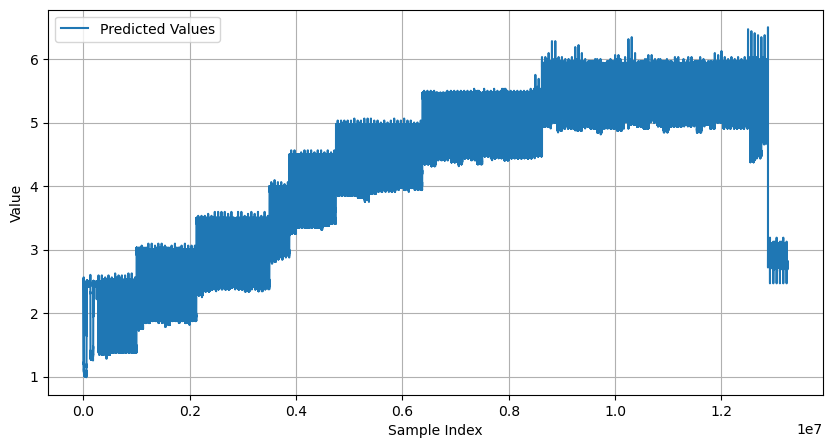

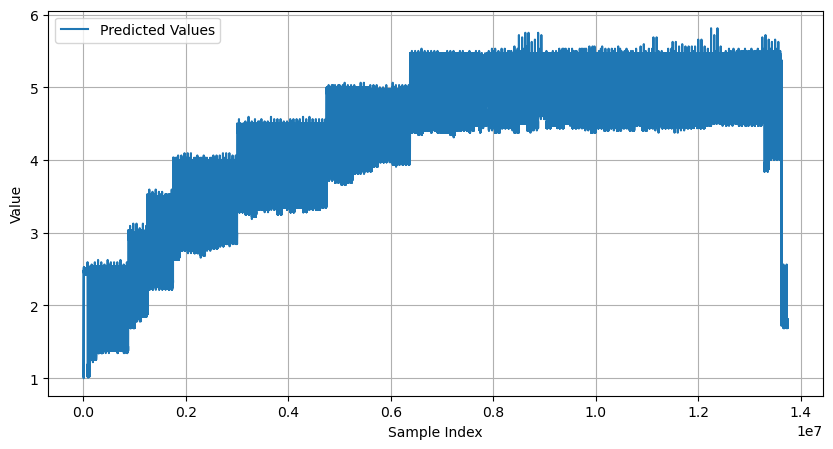

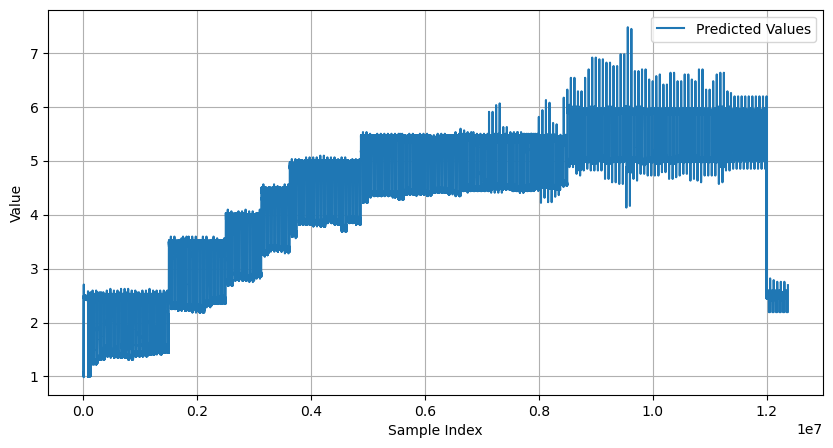

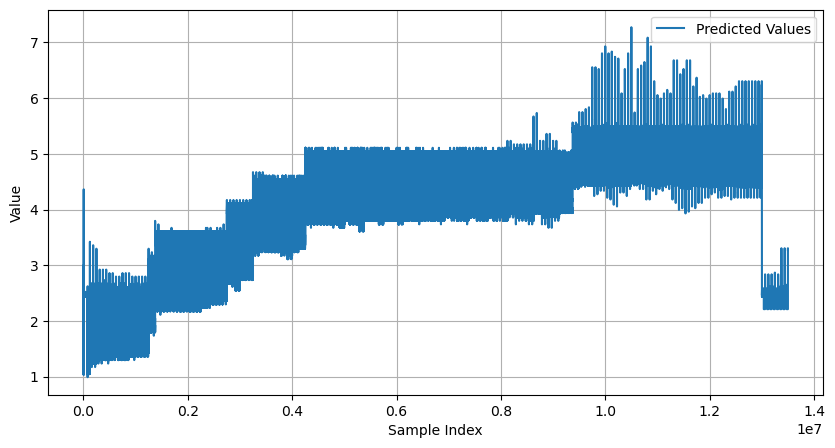

In [15]:
for i in range(len(mat_data_set)):
  plt.figure(figsize=(10, 5))
  x_values = np.arange(len(ce_window_smooth[i]))
  plt.plot(x_values, ce_window_smooth[i], label="Predicted Values")
  plt.xlabel("Sample Index")
  plt.ylabel("Value")
  plt.legend()
  plt.grid()
  plt.show()

In [18]:
mat_file_2 = r'C:\Users\JASH\Downloads\device_4' 
mat_data_2 = scipy.io.loadmat(mat_file_2)
mat_data_2['matrix']

array([[1.09482932, 1.09669671, 1.09727953, ..., 1.08408146, 1.08805353,
        1.09182246],
       [3.25799941, 3.27267857, 3.29006325, ..., 3.22015902, 3.23364931,
        3.24567702],
       [2.80801226, 2.81212095, 2.81617059, ..., 2.7901756 , 2.79721141,
        2.80336617],
       ...,
       [2.78781764, 2.79158128, 2.79821284, ..., 2.78095293, 2.78443067,
        2.7860968 ],
       [2.81907981, 2.81706508, 2.8186105 , ..., 2.83023671, 2.82803085,
        2.82358684],
       [3.28085569, 3.27988877, 3.27808846, ..., 3.25803376, 3.27076665,
        3.27821907]])

In [24]:
a = [[1,2,3],[4,5,6]]
print(a)
a=np.array(a).flatten()
print(a)

[[1, 2, 3], [4, 5, 6]]
[1 2 3 4 5 6]


In [44]:
ce_data_new = [None] * len(mat_data_set)
for j in range(len(mat_data_set)):
    for i in range(len(ce_window_smooth[j])):
        if i>=90*125000 and ce_window_smooth[j][i]<=4.0:
            break
    ce_data_new[j] = ce_window_smooth[j][:i]

In [47]:
for j in range(len(mat_data_set)):
    print(len(ce_data_new[j])%125000)
    print(int(len(ce_data_new[j])/125000))
    print(j)
    print("vvvvvvvvvvvvvvvvvvv")

0
103
0
vvvvvvvvvvvvvvvvvvv
37299
106
1
vvvvvvvvvvvvvvvvvvv
0
96
2
vvvvvvvvvvvvvvvvvvv
37456
91
3
vvvvvvvvvvvvvvvvvvv


In [75]:
time_dev_new = [None] * len(mat_data_set)
for j in range(len(mat_data_set)):
    if len(ce_data_new[j])%125000 == 0:
        time_dev_new[j] = time_dev[j][:(int(len(ce_data_new[j])/125000))]
    else:
        time_dev_new[j] = time_dev[j][:(int(len(ce_data_new[j])/125000)+1)]
    

In [76]:
for j in range(len(mat_data_set)):
    print(len(time_dev_new[j]))
    print(j)
    print("vvvvvvvvvvvvvvvvvvv")

103
0
vvvvvvvvvvvvvvvvvvv
107
1
vvvvvvvvvvvvvvvvvvv
96
2
vvvvvvvvvvvvvvvvvvv
92
3
vvvvvvvvvvvvvvvvvvv


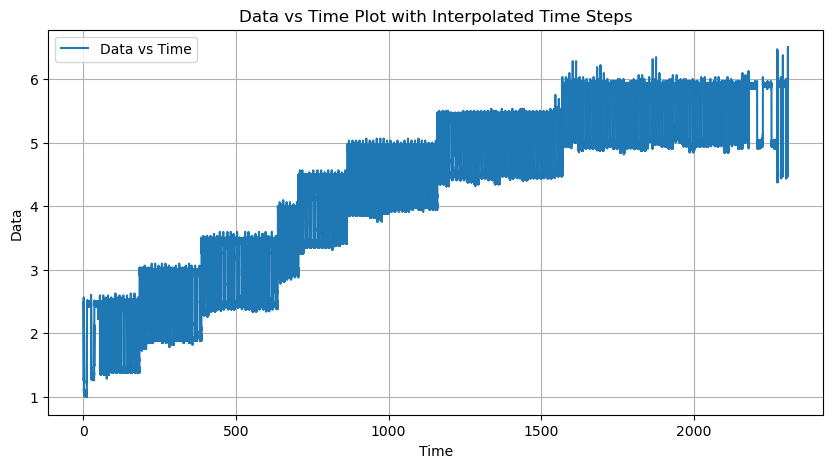

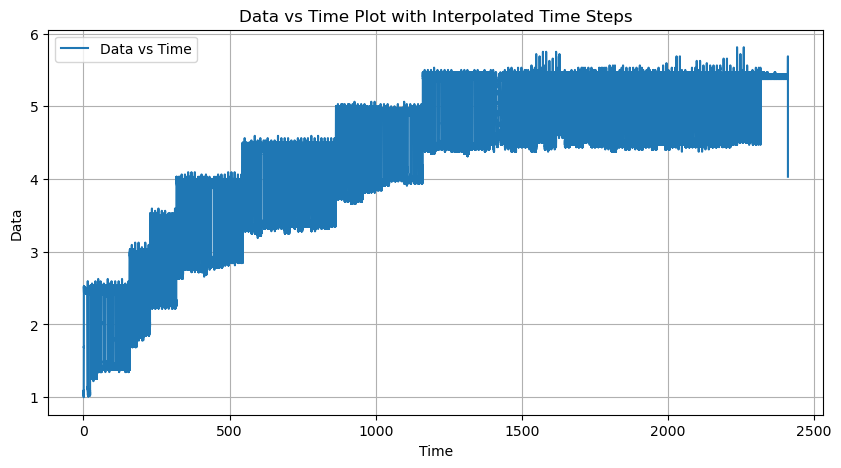

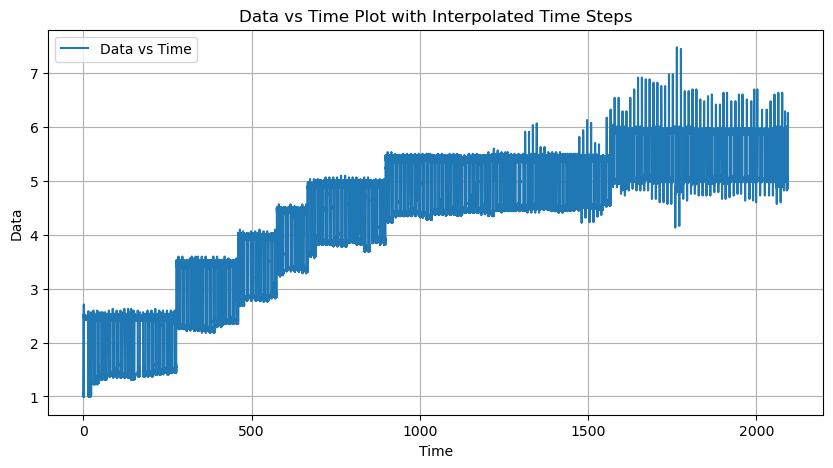

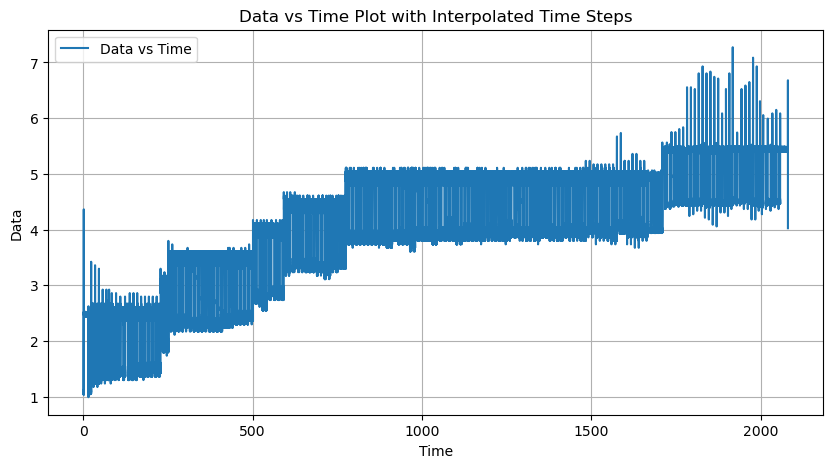

In [77]:
x = 125000
for j in range(len(mat_data_set)):
    n = int(len(ce_data_new[j])/x)
    time_expanded = np.empty(0)
    
    for i in range(n - 1):
        # Interpolate x points between consecutive time steps
        interp_times = np.linspace(time_dev_new[j][i], time_dev_new[j][i + 1], x, endpoint=False)
        time_expanded = np.append(time_expanded, interp_times)

    if len(ce_data_new[j])%x !=0:
        d = len(ce_data_new[j])%x 
        # Handle the last segment with d points
        last_segment = np.linspace(time_dev_new[j][-2], time_dev_new[j][-1], d, endpoint=False)
        time_expanded = np.append(time_expanded, last_segment)
    
    # Add the last time point
    time_expanded = np.append(time_expanded, [time_dev_new[j][-1]] * x)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(time_expanded, ce_data_new[j], label="Data vs Time")
    plt.xlabel("Time")
    plt.ylabel("Data")
    plt.title("Data vs Time Plot with Interpolated Time Steps")
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
#swt data extraction and dbn algorithm starts here

In [92]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

mat_data_set_2 = [()]
# Load MATLAB file
mat_file_2 = r'C:\Users\JASH\Downloads\device_5' 
mat_data_2 = scipy.io.loadmat(mat_file_2)
mat_data_set_2 = np.append(mat_data_set_2, mat_data_2)

mat_file_2 = r'C:\Users\JASH\Downloads\device_2' 
mat_data_2 = scipy.io.loadmat(mat_file_2)
mat_data_set_2 = np.append(mat_data_set_2, mat_data_2)

mat_file_2 = r'C:\Users\JASH\Downloads\device_3' 
mat_data_2 = scipy.io.loadmat(mat_file_2)
mat_data_set_2 = np.append(mat_data_set_2, mat_data_2)

mat_file_2 = r'C:\Users\JASH\Downloads\device_4' 
mat_data_2 = scipy.io.loadmat(mat_file_2)
mat_data_set_2 = np.append(mat_data_set_2, mat_data_2)

#j=0 dev5
#j=1 dev2
#j=2 dev3
#j=3 dev4

ce_window_smooth_2 = [None] * len(mat_data_set_2)

for j in range(len(mat_data_set_2)):
    data = mat_data_set_2[j]['matrix']
    
    ce_data_swt = np.array(data).flatten()
    ce_window_smooth_2[j] = ce_data_swt

print("Done")

Done


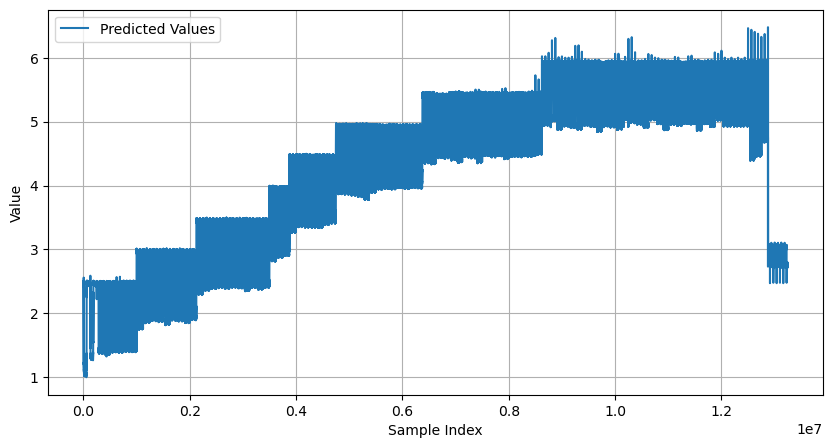

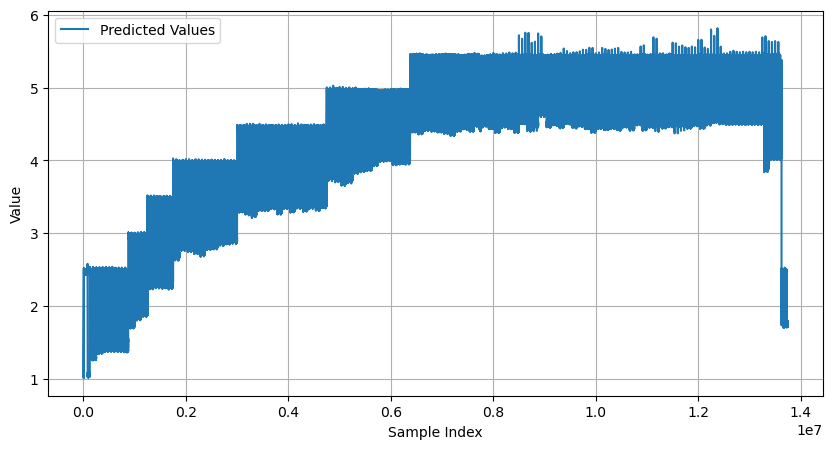

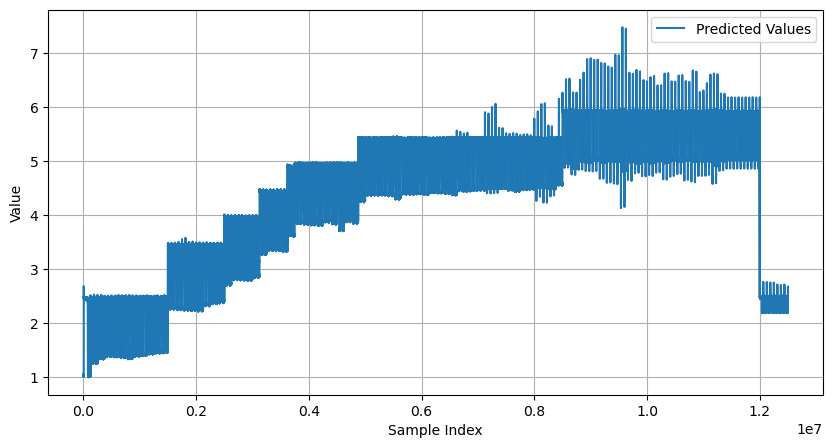

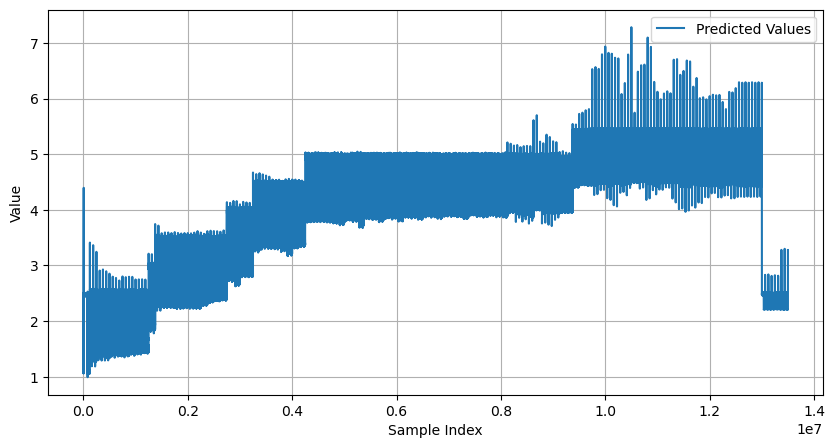

In [93]:
for i in range(len(mat_data_set)):
  plt.figure(figsize=(10, 5))
  x_values = np.arange(len(ce_window_smooth_2[i]))
  plt.plot(x_values, ce_window_smooth_2[i], label="Predicted Values")
  plt.xlabel("Sample Index")
  plt.ylabel("Value")
  plt.legend()
  plt.grid()
  plt.show()

In [94]:
ce_data_new_2 = [None] * len(mat_data_set)
for j in range(len(mat_data_set)):
    for i in range(len(ce_window_smooth_2[j])):
        if i>=90*125000 and ce_window_smooth_2[j][i]<=3.5:
            break
    ce_data_new_2[j] = ce_window_smooth_2[j][:i]

In [109]:
for j in range(len(mat_data_set)):
    print(len(ce_data_new_2[j])%125000)
    print(int(len(ce_data_new_2[j])/125000))
    print(j)
    print("vvvvvvvvvvvvvvvvvvv")

0
103
0
vvvvvvvvvvvvvvvvvvv
0
109
1
vvvvvvvvvvvvvvvvvvv
0
96
2
vvvvvvvvvvvvvvvvvvv
0
104
3
vvvvvvvvvvvvvvvvvvv


In [96]:
time_dev_new_2 = [None] * len(mat_data_set)
for j in range(len(mat_data_set)):
    if len(ce_data_new_2[j])%125000 == 0:
        time_dev_new_2[j] = time_dev[j][:(int(len(ce_data_new_2[j])/125000))]
    else:
        time_dev_new_2[j] = time_dev[j][:(int(len(ce_data_new_2[j])/125000)+1)]
    

C:\Users\JASH\anaconda3\envs\scsqr_iitkgp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


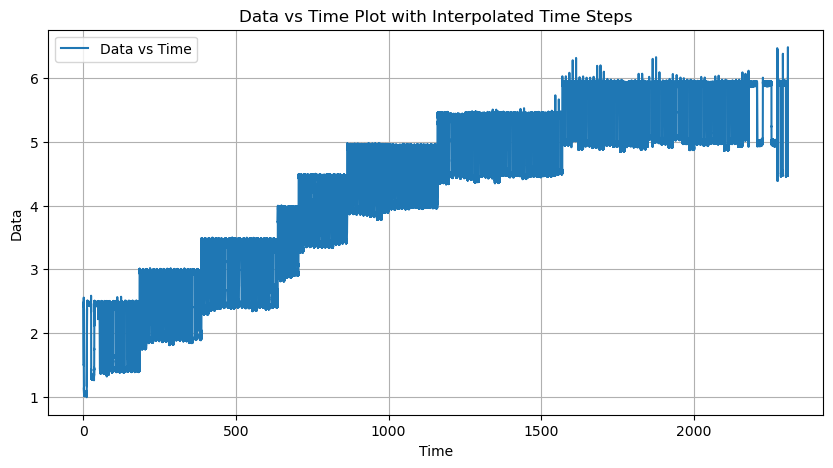

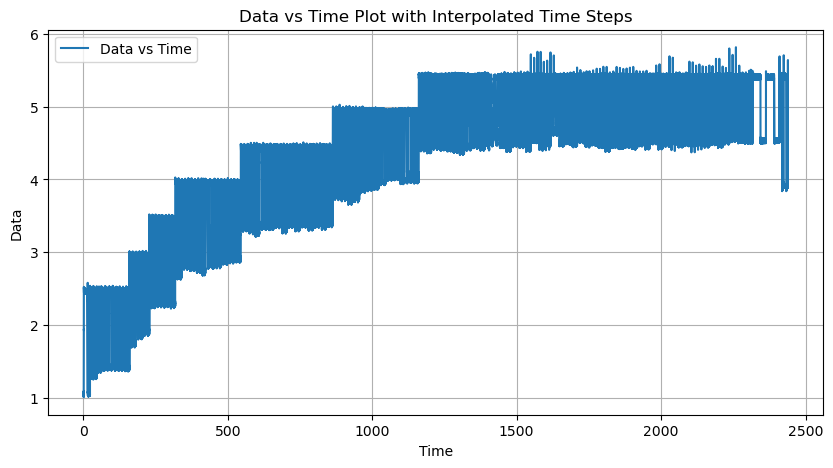

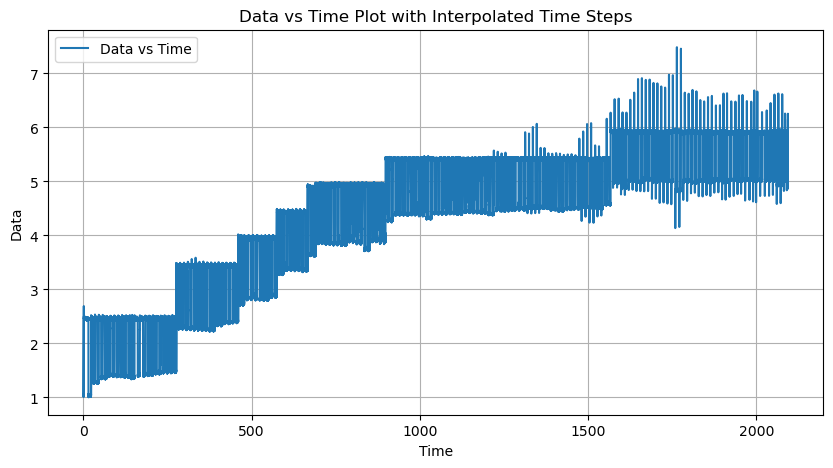

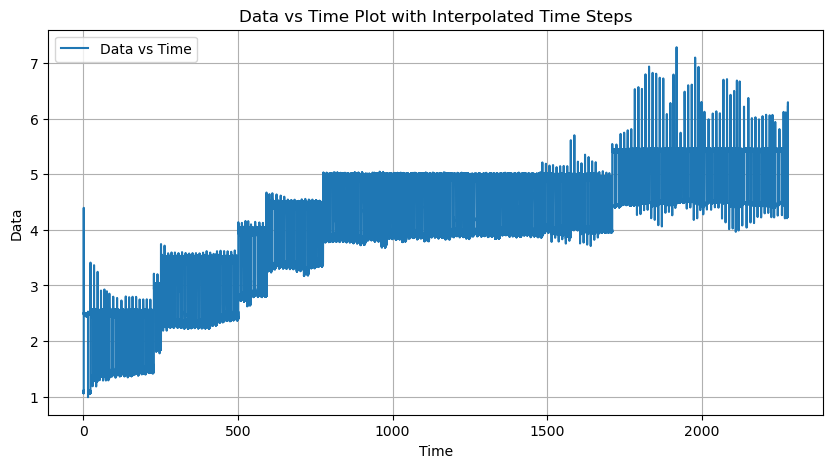

In [130]:
x = 125000
time_expanded_1d = [None]*len(mat_data_set)
for j in range(len(mat_data_set)):
    n = int(len(ce_data_new_2[j])/x)
    time_expanded_1d[j] = np.empty(0)
    for i in range(n - 1):
        # Interpolate x points between consecutive time steps
        interp_times = np.linspace(time_dev_new_2[j][i], time_dev_new_2[j][i + 1], x, endpoint=False)
        time_expanded_1d[j] = np.append(time_expanded_1d[j], interp_times)

    if len(ce_data_new_2[j])%x !=0:
        d = len(ce_data_new_2[j])%x 
        # Handle the last segment with d points
        last_segment = np.linspace(time_dev_new_2[j][-2], time_dev_new_2[j][-1], d, endpoint=False)
        time_expanded_1d[j] = np.append(time_expanded_1d[j], last_segment)
    
    # Add the last time point
    time_expanded_1d[j] = np.append(time_expanded_1d[j], [time_dev_new_2[j][-1]] * x)
    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(time_expanded_1d[j], ce_data_new_2[j], label="Data vs Time")
    plt.xlabel("Time")
    plt.ylabel("Data")
    plt.title("Data vs Time Plot with Interpolated Time Steps")
    plt.grid(True)
    plt.legend()
    plt.show()

In [133]:
len(time_expanded_1d[0])

12875000

In [134]:
len(ce_data_new_2[0])

12875000

In [101]:
min(ce_window_smooth[3]-ce_window_smooth_2[3])

-0.207477382038034

In [135]:
# ✅ 2️⃣ Save the Matrix to a .mat File
mat_filename = r'C:\Users\JASH\Downloads\device_swt_1d_time_5.csv'
np.savetxt(mat_filename, ce_data_new_2[0])
np.savetxt(mat_filename, time_expanded_1d[0])

print(f"Matrix saved to {mat_filename}")

mat_filename = r'C:\Users\JASH\Downloads\device_swt_1d_time_2.csv'
np.savetxt(mat_filename, ce_data_new_2[1])
np.savetxt(mat_filename, time_expanded_1d[1])

print(f"Matrix saved to {mat_filename}")

mat_filename = r'C:\Users\JASH\Downloads\device_swt_1d_time_3.csv'
np.savetxt(mat_filename, ce_data_new_2[2])
np.savetxt(mat_filename, time_expanded_1d[2])

print(f"Matrix saved to {mat_filename}")

mat_filename = r'C:\Users\JASH\Downloads\device_swt_1d_time_4.csv'
np.savetxt(mat_filename, ce_data_new_2[3])
np.savetxt(mat_filename, time_expanded_1d[3])

print(f"Matrix saved to {mat_filename}")

Matrix saved to C:\Users\JASH\Downloads\device_swt_1d_time_5.csv
Matrix saved to C:\Users\JASH\Downloads\device_swt_1d_time_2.csv
Matrix saved to C:\Users\JASH\Downloads\device_swt_1d_time_3.csv
Matrix saved to C:\Users\JASH\Downloads\device_swt_1d_time_4.csv


In [116]:
time_dev[0]

array([   0.,   24.,   48.,   70.,   84.,  111.,  136.,  161.,  184.,
        206.,  229.,  251.,  274.,  297.,  319.,  342.,  358.,  387.,
        410.,  433.,  451.,  478.,  496.,  524.,  546.,  569.,  592.,
        610.,  637.,  660.,  682.,  705.,  721.,  746.,  773.,  796.,
        819.,  841.,  864.,  887.,  910.,  932.,  955.,  978., 1000.,
       1023., 1046., 1069., 1092., 1114., 1137., 1160., 1183., 1198.,
       1226., 1251., 1273., 1296., 1319., 1341., 1364., 1387., 1410.,
       1432., 1455., 1478., 1501., 1523., 1546., 1569., 1592., 1614.,
       1637., 1660., 1683., 1705., 1728., 1751., 1774., 1796., 1819.,
       1842., 1865., 1887., 1910., 1931., 1956., 1978., 2001., 2024.,
       2047., 2070., 2092., 2115., 2138., 2159., 2179., 2179., 2179.,
       2179., 2273., 2275., 2308., 2330., 2330., 2330.])

In [117]:
len(ce_window_smooth_2[0])

13250000

In [113]:
ce_window_smooth[0]

array([2.4609375 , 2.47558594, 2.46826172, ..., 2.75050002, 2.75050002,
       2.75050002])

In [125]:
for j in range(len(mat_data_set)):
    print(len(ce_window_smooth[j]))
    print(j)
    print("vvvvvvvvvvvvvvvvvvv")

13250000
0
vvvvvvvvvvvvvvvvvvv
13750000
1
vvvvvvvvvvvvvvvvvvv
12375000
2
vvvvvvvvvvvvvvvvvvv
13500000
3
vvvvvvvvvvvvvvvvvvv


In [124]:
len(time_expanded)

13000000